<a href="https://colab.research.google.com/github/InshaSadaf/ml-foundations-notes/blob/main/2_linear_algebra_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EigenDecomposition**

**Affine Transformation via Matrix Application**

Lets say we have a vector v :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
v = np.array([3,1])
v

array([3, 1])

In [ ]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

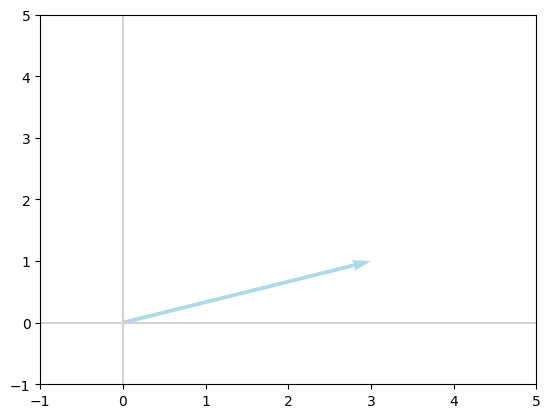

In [ ]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)


"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:


In [ ]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [ ]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [ ]:
v == Iv

array([ True,  True])

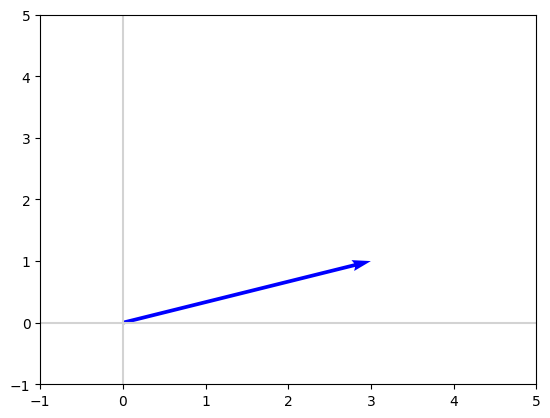

In [ ]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)


In contrast, consider this matrix(lets call it E) that flips vector over the x-axis:

In [ ]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Ev = np.dot(E,v)

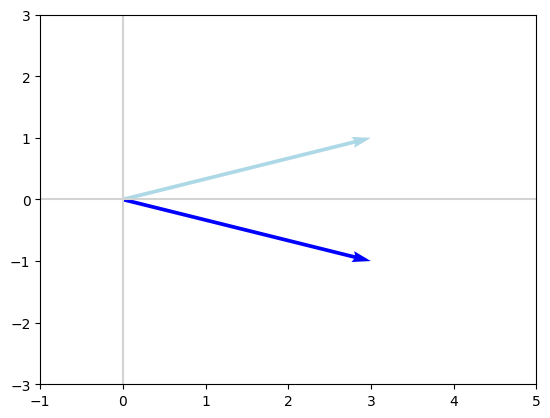

In [ ]:
plot_vectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
_=plt.ylim(-3,3)

or this matrix,F , which flips vector over the y-axis:

In [ ]:
F = np.array([[-1,0],[0,1]])

In [ ]:
Fv= np.dot(F,v)
Fv

array([-3,  1])

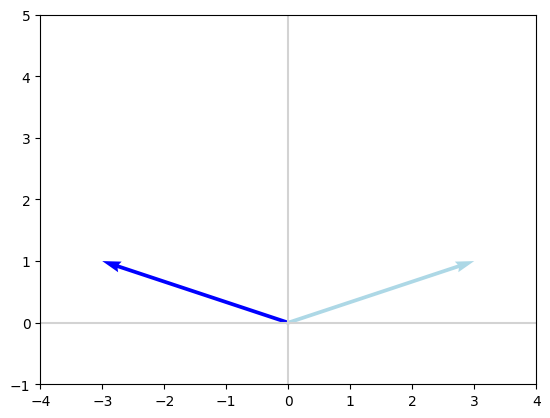

In [ ]:
plot_vectors([v,Fv],['lightblue','blue'])
plt.xlim(-4,4)
_=plt.ylim(-1,5)

Applying a **flipping matrix** is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

- Scaling (changing the length of vectors)
- Shearing
- Rotation


A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix A
 to the vector v
:





In [ ]:
A= np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

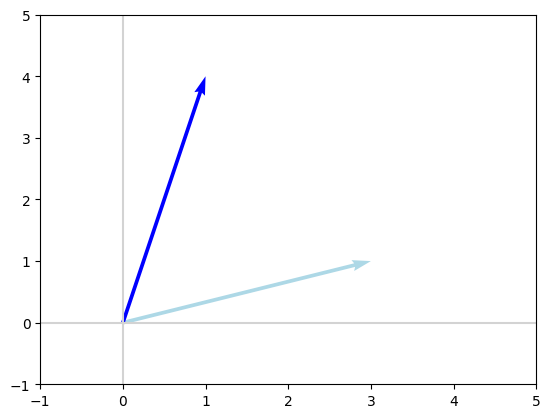

In [ ]:
plot_vectors([v,np.dot(A,v)],['lightblue','blue'])
plt.xlim(-1,5)
_=plt.ylim(-1,5)

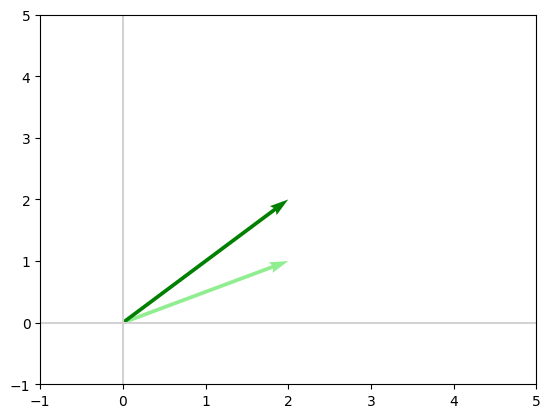

In [ ]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, V
), where each column is a separate vector. Then, whatever linear transformations we apply to V
 will be independently applied to each column (vector):


In [ ]:
v

array([3, 1])

In [ ]:
np.matrix(v).T

matrix([[3],
        [1]])

In [ ]:
v3 = np.array([-3,-1]) #mirror image over both axis
v4 = np.array([-1,-1])

In [ ]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                    axis = 1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1, -1]])

In [ ]:
IV = np.dot(I,V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1, -1]])

In [ ]:
AV = np.dot(A,V)
AV

matrix([[ 1,  2, -1, -3],
        [ 4,  2, -4,  0]])

In [ ]:
#function to convert column of matrix to 1 D vector:
def vectorfy(mtrx,clmn):
  return np.array(mtrx[:,clmn]).reshape(-1)

In [ ]:
vectorfy(V,0)

array([3, 1])

In [ ]:
vectorfy(V,0)==v

array([ True,  True])

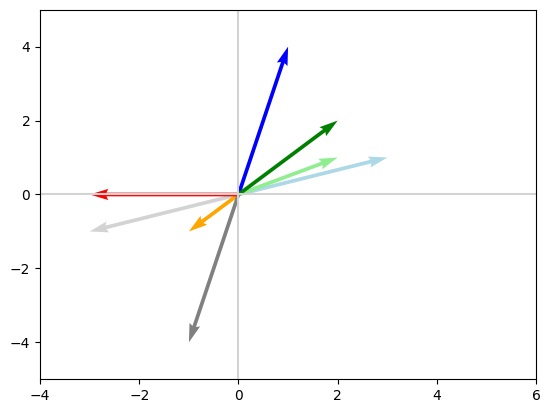

In [ ]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

**Eigen Vectors and Eigen Values**


In [ ]:
A = np.array([[1,2],[5,4]])
A

array([[1, 2],
       [5, 4]])

In [ ]:
lambdas , V = np.linalg.eig(A)

In [ ]:
V

array([[-0.70710678, -0.37139068],
       [ 0.70710678, -0.92847669]])

In [ ]:
lambdas

array([-1.,  6.])

lets first confirm that Av = lamda v for the first eigenvector:



In [ ]:
v = V[:,0]
v

array([-0.70710678,  0.70710678])

In [ ]:
lambduh = lambdas[0]
lambduh

np.float64(-1.0)

In [ ]:
Av = np.dot(A,v)
Av

array([ 0.70710678, -0.70710678])

In [ ]:
lambduh *v

array([ 0.70710678, -0.70710678])

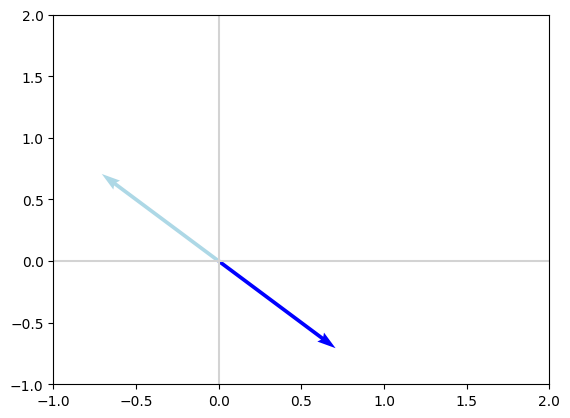

In [ ]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_=plt.ylim(-1,2)

In [ ]:
v2 = V[:,1]
v2


array([-0.37139068, -0.92847669])

In [ ]:
Av2 = np.dot(A,v2)
Av2

array([-2.22834406, -5.57086015])

In [ ]:
lambdah = lambdas[1]
lambdah


np.float64(6.0)

In [ ]:
lambdah * v2

array([-2.22834406, -5.57086015])

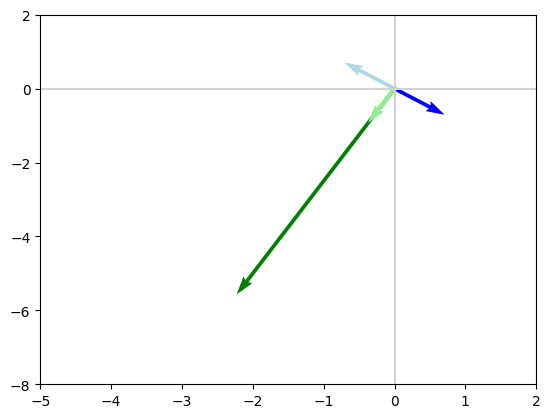

In [ ]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-5,2)
_=plt.ylim(-8,2)

**Eigendecomposition**
The eigendecomposition of some matrix A is
A = V LAMBDA V^-1


In [ ]:
A = np.array([[4,2],[-5,-3]])

In [ ]:
lambdas , V = np.linalg.eig(A)
lambdas

array([ 2., -1.])

In [ ]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [ ]:
lambdah = lambdas[:1]
lambdah

array([2.])

In [ ]:
vinv = np.linalg.inv(V)
vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [ ]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

confirm that A = Vdiag(lambda)V^-1

In [ ]:
np.dot(V,np.dot(Lambda,vinv))

array([[ 4.,  2.],
       [-5., -3.]])

**Singular Value Decomposition**
A = UDV^T

In [ ]:
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [ ]:
U,d,VT =  np.linalg.svd(A)

In [ ]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [ ]:
d

array([8.66918448, 4.10429538])

In [ ]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [ ]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

D must have the same dimensions as A for UDV^T matrix multiplication to be possible :

In [ ]:
D = np.concatenate((np.diag(d),[[0,0]]),axis = 0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [ ]:
np.dot(U,np.dot(D,VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])


SVD and eigendecomposition are closely related to each other:

- Left-singular vectors of A
 = eigenvectors of AA^T

- Right-singular vectors of A
 = eigenvectors of A^TA

- Non-zero singular values of A
 = square roots of eigenvalues of AA^T
 = square roots of eigenvalues of A^TA





In [ ]:
import torch


In [ ]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [ ]:
U,d,Vt = np.linalg.svd(P)

In [ ]:
VT = Vt.T
VT

tensor([[-0.9810, -0.0113,  0.1937],
        [-0.1196,  0.8211, -0.5581],
        [ 0.1528,  0.5706,  0.8069]])

In [ ]:
PtP = P.T@P
PPt = P@P.T

In [ ]:
eigenvalue_PtP , eigenvectorsPtP = torch.linalg.eig(PtP)
eigenvalue_PPt , eigenvectorsPPt = torch.linalg.eig(PPt)


In [ ]:
print("U:\n", U)
print("Eigenvectors of P@P.T:\n", eigenvectorsPPt)

U:
 tensor([[-0.9757, -0.1823, -0.1214],
        [-0.0975, -0.1350,  0.9860],
        [-0.1961,  0.9739,  0.1140]])
Eigenvectors of P@P.T:
 tensor([[-0.9757+0.j, -0.1823+0.j,  0.1214+0.j],
        [-0.0975+0.j, -0.1350+0.j, -0.9860+0.j],
        [-0.1961+0.j,  0.9739+0.j, -0.1140+0.j]])


In [ ]:
    print("V:\n", V)
    print("Eigenvectors of P.T@P:\n", eigenvectorsPtP)

V:
 [[ 0.70710678 -0.37139068]
 [-0.70710678  0.92847669]]
Eigenvectors of P.T@P:
 tensor([[ 0.9810+0.j,  0.1937+0.j, -0.0113+0.j],
        [ 0.1196+0.j, -0.5581+0.j,  0.8211+0.j],
        [-0.1528+0.j,  0.8069+0.j,  0.5706+0.j]])


In [ ]:
    print("Singular values (d):\n",d)
    print("Square roots of eigenvalues of P.T@P:\n", torch.sqrt(eigenvalue_PtP.real)) # .real to handle potential complex output
    print("Square roots of eigenvalues of P@P.T:\n", torch.sqrt(eigenvalue_PPt.real))

Singular values (d):
 [26.163235  8.187547  2.539532]
Square roots of eigenvalues of P.T@P:
 tensor([26.1632,  2.5395,  8.1875])
Square roots of eigenvalues of P@P.T:
 tensor([26.1632,  8.1875,  2.5395])


**Image Compression via SVD**

In [ ]:
!pip install image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.3 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=bca49c9b4088cb433ed711ae15d43ae0bf7ce2f1b016edc7635376413f2a9837
  Stored in directory: /root/.cache/pip/wheels/58/30/d8/3212cd83eeeeee0a1f0c7b9b7bd0674a2b9f09342870473a2a
Successfully built image


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('cat.jpg')
_=plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'cat.jpg'

Lets convert it into grayscale so we dont have to deal with the complexity of multiple color channels:

In [ ]:
imgray = img.convert('LA')
_=plt.imshow(imgray)

Convert data into numpy matrix, which doesn't impact image data - but it will bring the image into a format where we work nicely.

In [ ]:
imgmat = np.array(list(imgray.getdata(band = 0)),float)
imgmat.shape = (imgray.size[1],imgray.size[0])
imgmat = np.matrix(imgmat)
_=plt.imshow(imgmat,cmap='gray')

calculate the SVD of the image

In [ ]:
U,sigma,V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag(lambda) so to are singular values,by convention,arranged in descending order in D(or in this code diag(sigma)).Thus, the first left sigular vector of U and right- singular vector of V may represent the most prominent feature of the image.

In [ ]:
reconstimg = np.matrix(U[:,:1])*np.diag(sigma[:1])*np.matrix(V[:1,:])
_=plt.imshow(reconstimg,cmap='gray')

Adittional singular vector immprove the image quality

In [ ]:
for i in [2,4,8,16,32,64]:
  reconstimg = np.matrix(U[:,:i])*np.diag(sigma[:i])*np.matrix(V[:i,:])
  plt.imshow(reconstimg,cmap='gray')
  title = "n = %s" % i
  plt.title(title)
  plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the origignal image:

In [ ]:
imgmat.shape

In [ ]:
full_representation = 148*169
full_representation

In [ ]:
svd64_rep = 64*148+64+64*169
svd64_rep

In [ ]:
svd64_rep/full_representation

**Specifically, the image represented as 64 singular vectors is 81% of the size of the original!.
Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.**

**Principal Component Analysis**


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data[0:9,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components =2)

In [ ]:
X = pca.fit_transform(iris.data)

In [ ]:
X.shape

(150, 2)

In [ ]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

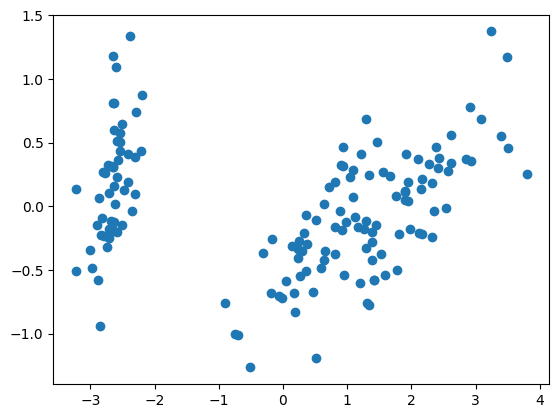

In [ ]:
_= plt.scatter(X[:,0],X[:,1])

In [ ]:
iris.target.shape

(150,)

In [ ]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [ ]:
unique_element , count_element = np.unique(iris.target,return_counts=True)
np.asarray((unique_element,count_element))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [ ]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

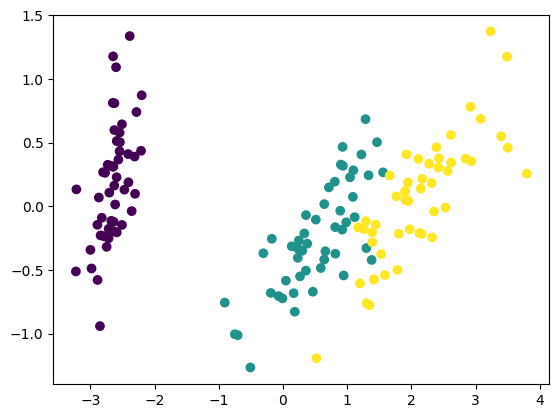

In [ ]:
_=plt.scatter(X[:,0],X[:,1], c = iris.target)